In [2]:
%config IPCompleter.greedy=True

In [7]:

from sklearn.datasets import fetch_openml
#importing MNIST dataset
mnist = fetch_openml('mnist_784')


In [8]:
import numpy as np
import pandas as pd

In [10]:
print(f' image dataset {mnist.data.shape}') #data contains images that have a pixel value from 0 to 16 (0 is white, 16 is blakc)
print(f' images as 28x28 table {mnist.target.shape}')


 image dataset (70000, 784)
 images as 28x28 table (70000,)


In [17]:
# sampling the data set 
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
# sampling the annotations
target = mnist.target[sample]

In [18]:
from sklearn.model_selection import train_test_split
# preparing the data set for by having a train 80% and test 20% split dataset x being the images and y the annotations
xtrain, xtest, ytrain, ytest = train_test_split(data,target,train_size=0.8)


In [19]:
from sklearn import neighbors
# choosing the memory based classifier with 3 closest 
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

#seeing the error of the model for the 3 closest
error = 1 - knn.score(xtest, ytest)
print(f"error: {error}")

error: 0.07099999999999995


going through k=2
going through k=3
going through k=4
going through k=5
going through k=6
going through k=7
going through k=8
going through k=9
going through k=10
going through k=11
going through k=12
going through k=13
going through k=14


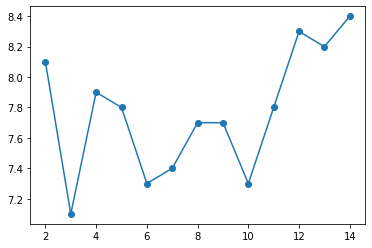

In [26]:
# optimising and finding the dataset's k 
import matplotlib.pyplot as plt

errors = []
for k in range(2,15):
    print(f"going through k={k}")
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()


In [32]:
# using the most optimal classifier
nn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# getting predictions on the dataset
predicted = knn.predict(xtest)

# resizing the data to get the images
images = xtest.reshape((-1, 28, 28))

# selecting 12 random images
select = np.random.randint(images.shape[0], size=12)




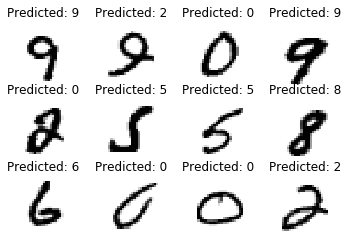

In [33]:
# displaying the images
fig, ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4, index+1)
    plt.axis('off')
    plt.imshow(images[value], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f"Predicted: {predicted[value]}")
    
plt.show()

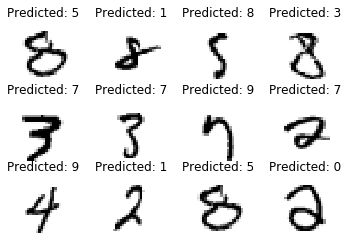

In [35]:
# get images that aren't well predicted
misclass  = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# sampling 
select = np.random.randint(misclass_images.shape[0], size=12)

# showing the images that aren't well 
for index,value in enumerate(select):
    plt.subplot(3,4, index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Predicted: {misclass_predicted[value]}')
    
plt.show()